# **Handling Categorical Variables**

Handling Categorical/Qualitative variables is an important step in data preprocessing.Many Machine learning algorithms can not handle categorical variables by themself unless we convert them to numerical values.And performance of ML algorithms is based on how Categorical variables are encoded.
The results produced by the model varies from different encoding techniques used.

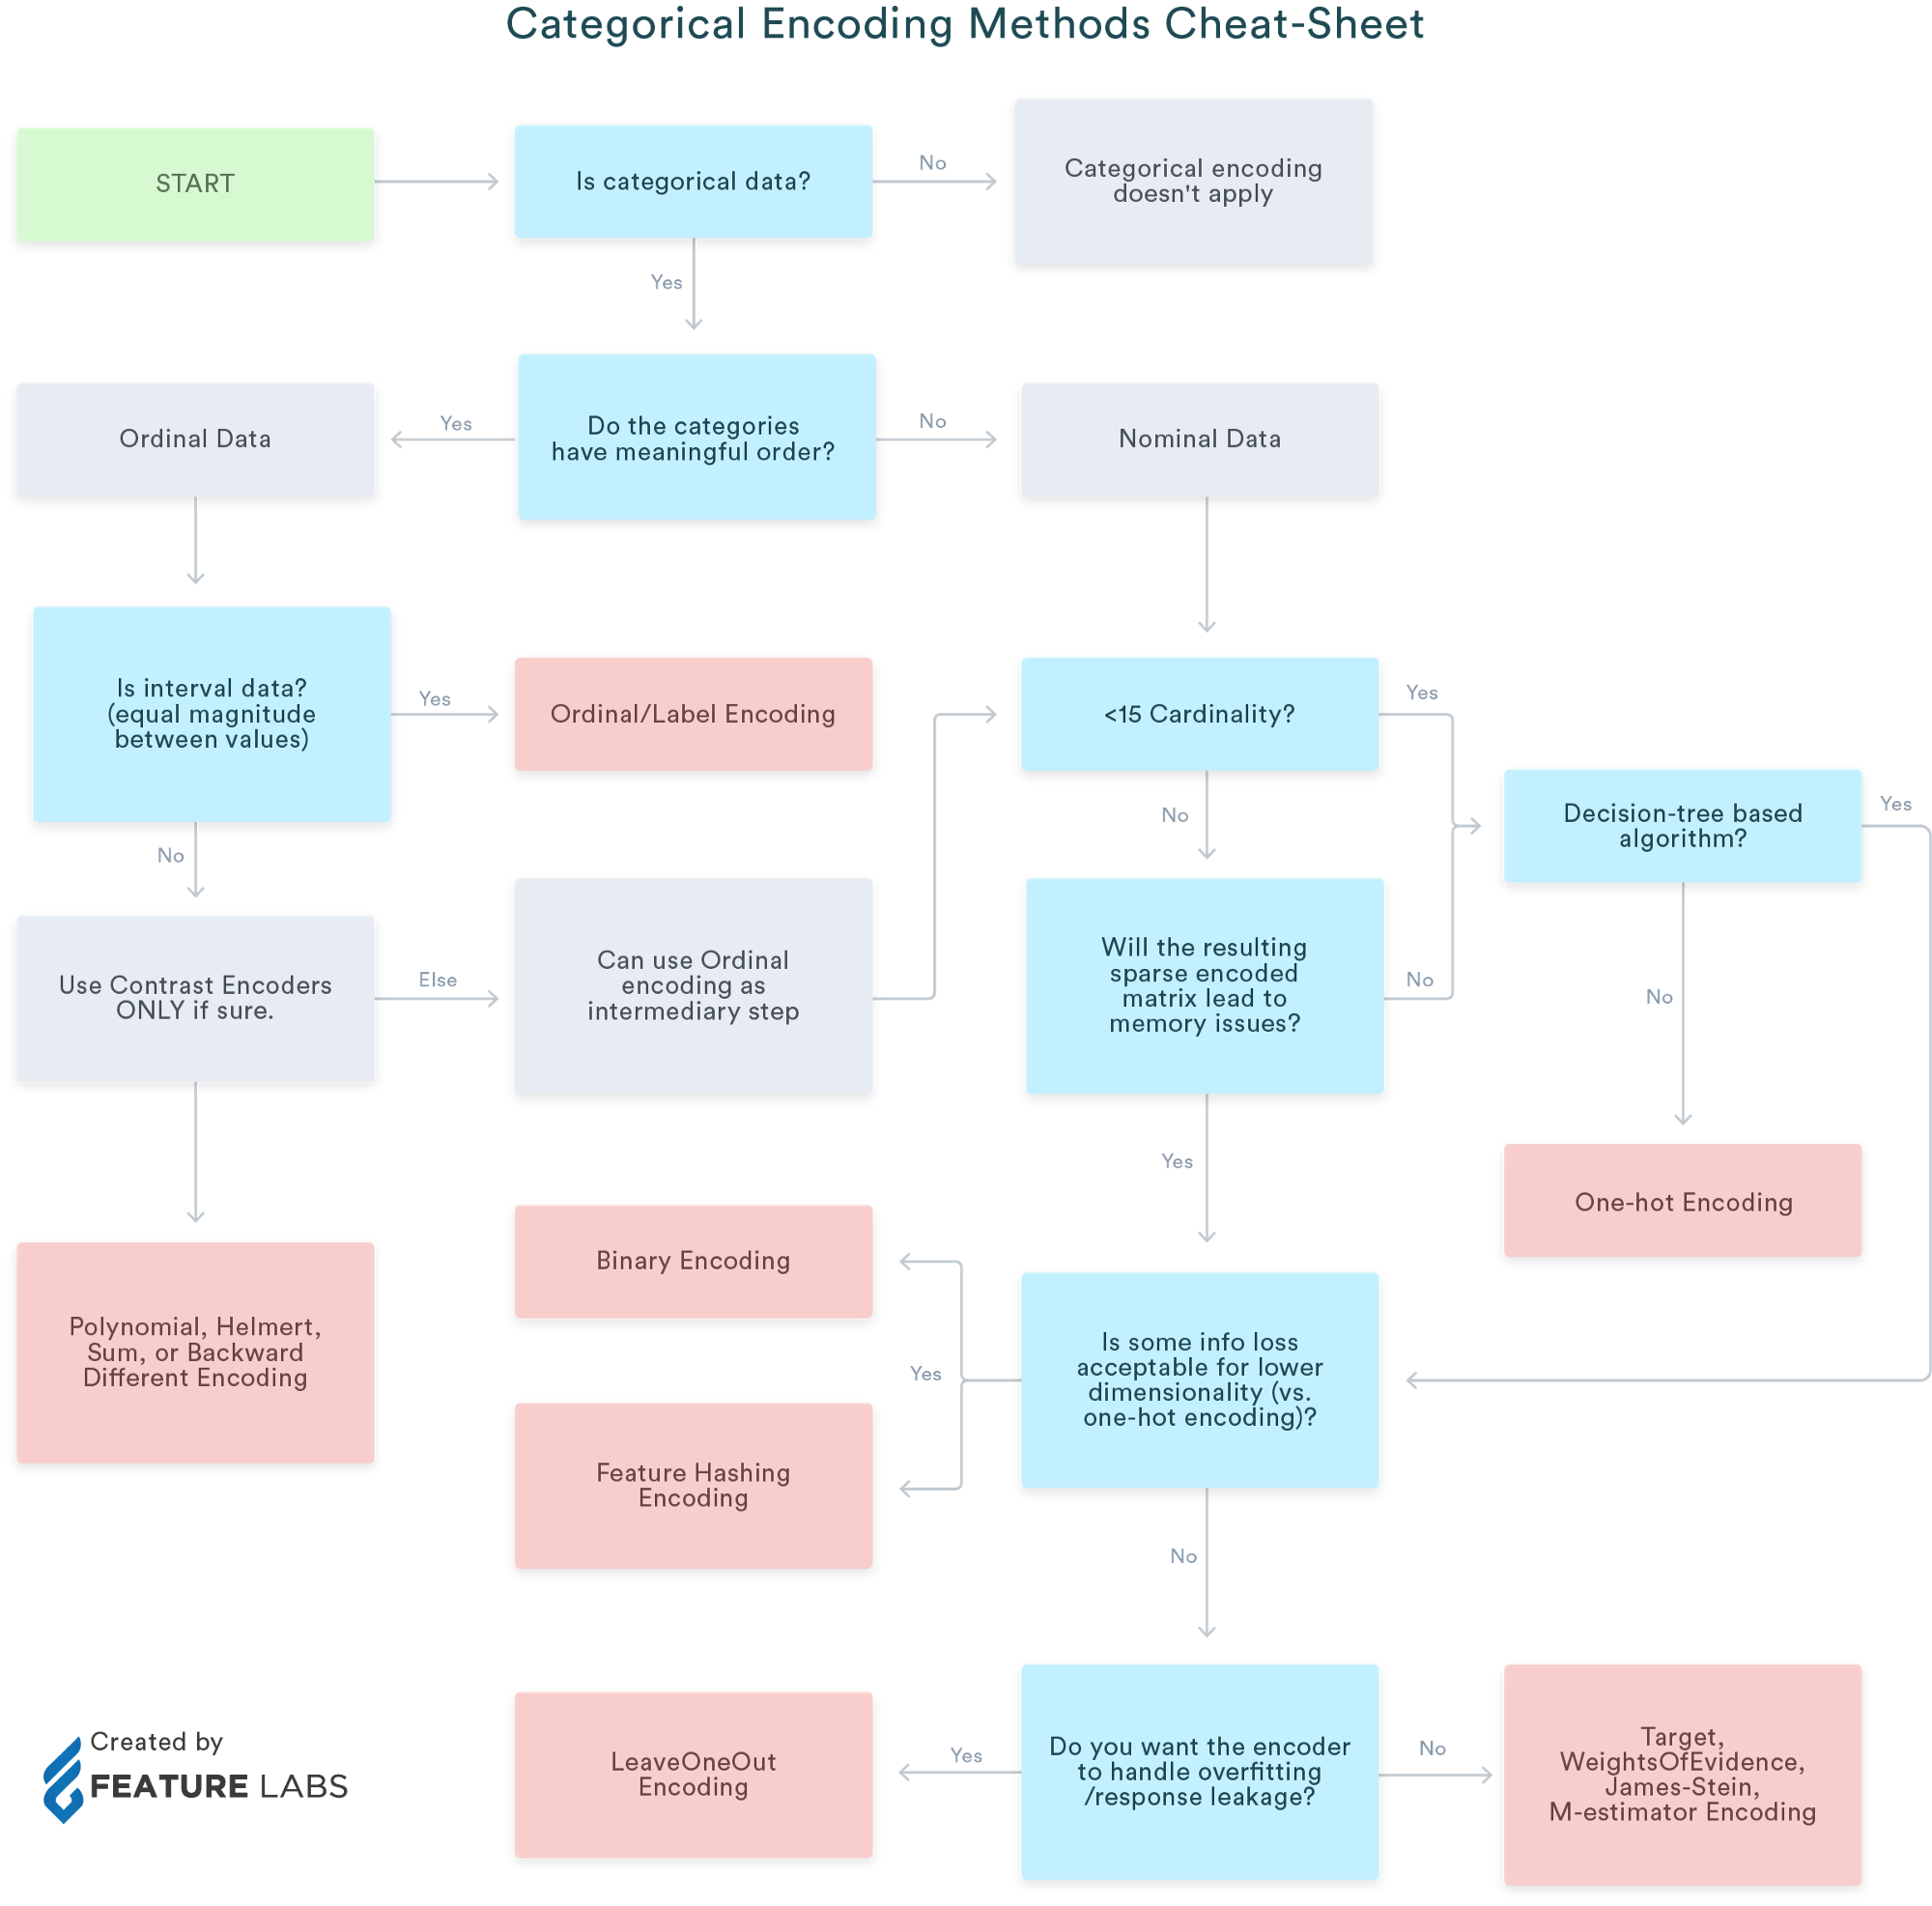

There are many ways we can encode these categorical variables.


1. One Hot Encoding
2. Label Encoding
3. Ordinal Encoding
4. Frequency Encoding
5. Binary Encoding
6. Helmert Encoding 
7. Mean Encoding
8. Weight of Evidence Encoding
9. Probability Ratio Encoding
10. Hashing Encoding
11. Backward Difference Encoding
12. Leave One Out Encoding
13. James-Stein Encoding
14. M-estimator Encoding
15. Thermometer Encoder 



In [1]:
# We are gonna use following libraries to perform encoding.
!pip install scikit-learn
!pip install category-encoders

     |████████████████████████████████| 81kB 2.1MB/s 


In [2]:
import pandas as pd , numpy as np
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
data = {'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
        'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
        'Target':[1,1,1,0,1,0,1,0,1,1]}
df = pd.DataFrame(data)
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


# 1. One Hot Encoding

In this technique, it creates a new column/feature for each category in the Categorical Variable and replaces with either 1 (presence of the feature) or 0 (absence of the feature). The number of column/feature depends on the number of categories in the Categorical Variable.This method slows down the learning process significantly if the number of the categories are very high.

In [ ]:
# Using get_dummies method in pandas
df_ohe = df.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Temp' ,columns=['Temperature'],drop_first=False)
one_hot_1.insert(loc=2, column='Temperature', value=df.Temperature.values)
one_hot_1

,Color,Target,Temperature,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,Hot,0,1,0,0
1,Yellow,1,Cold,1,0,0,0
2,Blue,1,Very Hot,0,0,1,0
3,Blue,0,Warm,0,0,0,1
4,Red,1,Hot,0,1,0,0
5,Yellow,0,Warm,0,0,0,1
6,Red,1,Warm,0,0,0,1
7,Yellow,0,Hot,0,1,0,0
8,Yellow,1,Hot,0,1,0,0
9,Yellow,1,Cold,1,0,0,0


In [ ]:
# Using OneHotEncoder in sklearn
from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first')
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(df['Temperature'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Temp_Cold','Temp_Hot','Temp_Very_Hot','Temp_Warm'])
pd.concat([df,oh_df],axis=1)

,Temperature,Color,Target,Temp_Cold,Temp_Hot,Temp_Very_Hot,Temp_Warm
0,Hot,Red,1,0.0,1.0,0.0,0.0
1,Cold,Yellow,1,1.0,0.0,0.0,0.0
2,Very Hot,Blue,1,0.0,0.0,1.0,0.0
3,Warm,Blue,0,0.0,0.0,0.0,1.0
4,Hot,Red,1,0.0,1.0,0.0,0.0
5,Warm,Yellow,0,0.0,0.0,0.0,1.0
6,Warm,Red,1,0.0,0.0,0.0,1.0
7,Hot,Yellow,0,0.0,1.0,0.0,0.0
8,Hot,Yellow,1,0.0,1.0,0.0,0.0
9,Cold,Yellow,1,1.0,0.0,0.0,0.0


In [34]:
# Using category_encoders OneHotEncoder
import category_encoders as ce
ohe = ce.OneHotEncoder(cols=['Temperature'])
ce_ohe = ohe.fit_transform(df.iloc[:,0], df.iloc[:,-1])
ce_ohe.columns = ['Temp_Hot','Temp_Cold','Temp_Very_Hot','Temp_Warm']
pd.concat([df,ce_ohe],axis=1)

,Temperature,Color,Target,Temp_Hot,Temp_Cold,Temp_Very_Hot,Temp_Warm
0,Hot,Red,1,1,0,0,0
1,Cold,Yellow,1,0,1,0,0
2,Very Hot,Blue,1,0,0,1,0
3,Warm,Blue,0,0,0,0,1
4,Hot,Red,1,1,0,0,0
5,Warm,Yellow,0,0,0,0,1
6,Warm,Red,1,0,0,0,1
7,Hot,Yellow,0,1,0,0,0
8,Hot,Yellow,1,1,0,0,0
9,Cold,Yellow,1,0,1,0,0


1. For Regression, we can use N-1 (drop first or last column of One Hot Coded new feature ), 
2. For classification, the recommendation is to use all N columns as most of the tree-based algorithm builds a tree based on all available variables. 

**Disadvantages:** 
1. Tree algorithms cannot be applied to one-hot encoded data since it creates a sparse matrix.
2. When the feature contains too many unique values, that many features are created which may result in overfitting.

# 2. Label Encoding

In this encoding, a unique value is assigned for different labels/categories.<br>
One major issue with sklearn.LabelEncoder is it assigns the values to the labels based on the Alphabetical order of the lables.<br>
Ex : Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 

In [ ]:
# Using sklearn LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_ohe['Temperature_encoded'] = le.fit_transform(df.Temperature)
df_ohe

,Temperature,Color,Target,Temperature_encoded
0,Hot,Red,1,1
1,Cold,Yellow,1,0
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,1
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,1
8,Hot,Yellow,1,1
9,Cold,Yellow,1,0


In [ ]:
# Using Pandas factorize()
fact = df.copy()
fact['Temperature_factor'] = pd.factorize(df.Temperature)[0]
fact

,Temperature,Color,Target,Temperature_factor
0,Hot,Red,1,0
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,0
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,0
8,Hot,Yellow,1,0
9,Cold,Yellow,1,1


**Disadvantages:** 
1. It mis-leads the information by assigning values based on Alphabetical order instead of actual label order.

# 3. Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_val = oe.fit_transform(df['Temperature'].values.reshape(-1, 1))
pd.concat([df,pd.DataFrame(oe_val,columns=['Temperature_Oe'])],axis=1)

,Temperature,Color,Target,Temperature_Oe
0,Hot,Red,1,1.0
1,Cold,Yellow,1,0.0
2,Very Hot,Blue,1,2.0
3,Warm,Blue,0,3.0
4,Hot,Red,1,1.0
5,Warm,Yellow,0,3.0
6,Warm,Red,1,3.0
7,Hot,Yellow,0,1.0
8,Hot,Yellow,1,1.0
9,Cold,Yellow,1,0.0


In [37]:
# Using category_encoders OrdinalEncoder
import category_encoders as ce
ohe = ce.OrdinalEncoder(cols=['Temperature'])
df['Temp_ce_oe'] = ohe.fit_transform(df.iloc[:,0], df.iloc[:,-1])
df

,Temperature,Color,Target,Temp_ce_oe
0,Hot,Red,1,1
1,Cold,Yellow,1,2
2,Very Hot,Blue,1,3
3,Warm,Blue,0,4
4,Hot,Red,1,1
5,Warm,Yellow,0,4
6,Warm,Red,1,4
7,Hot,Yellow,0,1
8,Hot,Yellow,1,1
9,Cold,Yellow,1,2


In [ ]:
# Best way is mapping based on their actual label order
# Ex : Cold < Warm <Hot < Very Hot = 1 < 2 < 3 < 4
Temp_order = {'Cold' : 1 , 'Warm' : 2 , 'Hot' : 3 , 'Very Hot' : 4}
df['Temperature_Order'] = df.Temperature.map(Temp_order)
df

,Temperature,Color,Target,Temperature_Order
0,Hot,Red,1,3
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,4
3,Warm,Blue,0,2
4,Hot,Red,1,3
5,Warm,Yellow,0,2
6,Warm,Red,1,2
7,Hot,Yellow,0,3
8,Hot,Yellow,1,3
9,Cold,Yellow,1,1


# 4. Frequency Encoding

In frequency encoding, each of the categories in the feature is replaced with the frequencies of categories.<br>
Here frequency of the categories is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.


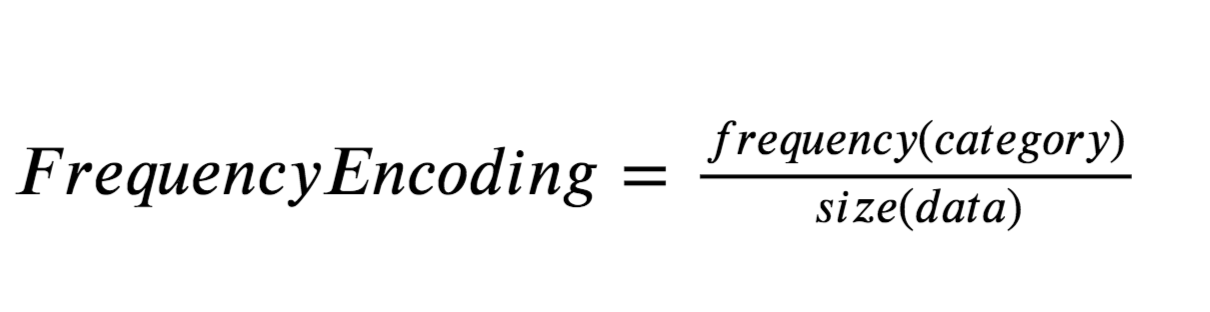

Category refers to each of the unique values in a feature.
1. **Frequency(category)** = Number of values in that category
2. **Size(data)** = Size of the entire dataset.

In [16]:
# Using Pandas groupby()
cat_freq = df.groupby('Temperature').size() / len(df)
df['Temp_Freq_Enc'] = df.Temperature.map(cat_freq)
df

,Temperature,Color,Target,Temp_Freq_Enc
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Blue,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Yellow,0,0.3
6,Warm,Red,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Yellow,1,0.4
9,Cold,Yellow,1,0.2


In [24]:
# Using category_encoders CountEncoder
import category_encoders as ce
ce = ce.CountEncoder(cols=['Temperature'])
df['Temp_Count_Enc'] = ce.fit_transform(df.iloc[:,0], df.iloc[:,-1])
df

,Temperature,Color,Target,Temp_Count_Enc
0,Hot,Red,1,4
1,Cold,Yellow,1,2
2,Very Hot,Blue,1,1
3,Warm,Blue,0,3
4,Hot,Red,1,4
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,4
8,Hot,Yellow,1,4
9,Cold,Yellow,1,2


**Disadvantage**:
1. If two categories have the same frequency then it is hard to distinguish between them.

# 5. Binary Encoding

1. It similar to onehot, but stores categories as binary bitstrings i.e., each binary bitstring creates one feature column.
2. Compared to One Hot Encoding, this will require fewer feature columns (for 100 categories, One Hot Encoding will have 100 features while for Binary encoding, we will need just seven features).<br>

**Feature -> ordinal encoding -> binary code -> digits of the binary code to separate columns.**

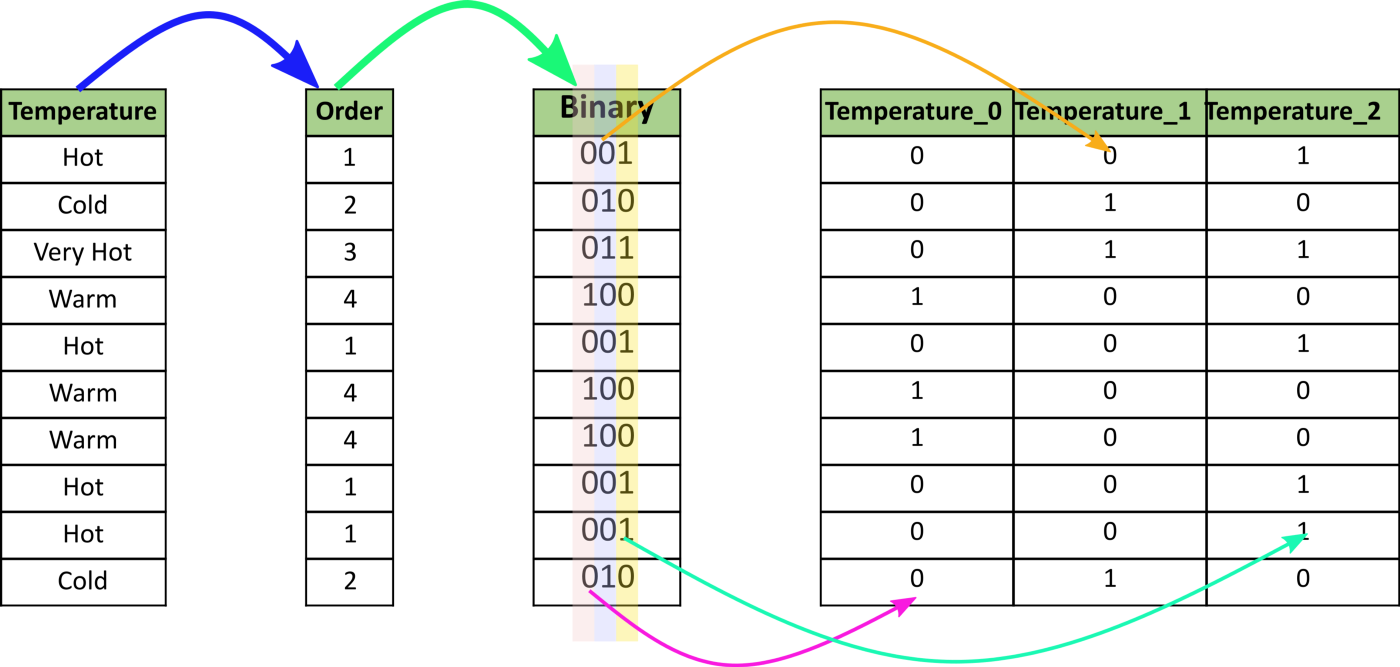

In [41]:
import category_encoders as ce
be = ce.BinaryEncoder(cols=['Temperature'])
be_df = be.fit_transform(df['Temperature'])
pd.concat([df,be_df],axis=1)

,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,0,0,1
1,Cold,Yellow,1,0,1,0
2,Very Hot,Blue,1,0,1,1
3,Warm,Blue,0,1,0,0
4,Hot,Red,1,0,0,1
5,Warm,Yellow,0,1,0,0
6,Warm,Red,1,1,0,0
7,Hot,Yellow,0,0,0,1
8,Hot,Yellow,1,0,0,1
9,Cold,Yellow,1,0,1,0


# 6. Helmert Encoding

In [ ]:
from category_encoders.m_estimate import MEstimateEncoder
# use MEstimateEncoder to encode categorical features
me = MEstimateEncoder(m=100)
# transform the datasets
x_train, y_train = train_nominal[train_nominal.columns[:-1]], train_nominal['SalePrice']
train_mest_encoded = me.fit_transform(x_train,y_train)

In [ ]:
y_train.mean()

24.284

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16
247,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52


In [ ]:
training_numeric_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,24.248261,0.538,6.575,65.2,4.0900,27.615762,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,24.248261,0.469,6.421,78.9,4.9671,26.833333,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,24.248261,0.469,7.185,61.1,4.9671,26.833333,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,24.248261,0.458,6.998,45.8,6.0622,28.533333,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,24.248261,0.458,7.147,54.2,6.0622,28.533333,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.19133,22.0,5.86,24.248261,0.431,5.605,70.2,7.9549,21.949066,330.0,19.1,389.13,18.46
246,0.33983,22.0,5.86,24.248261,0.431,6.108,34.9,8.0555,21.949066,330.0,19.1,390.18,9.16
247,0.19657,22.0,5.86,24.248261,0.431,6.226,79.2,8.0555,21.949066,330.0,19.1,376.14,10.15
248,0.16439,22.0,5.86,24.248261,0.431,6.433,49.1,7.8265,21.949066,330.0,19.1,374.71,9.52


In [ ]:
from category_encoders import TargetEncoder